In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Neural_network(object):
    def __init__(self):
        self.inputLayerSize=2
        self.outputlLayerSize=1
        self.hiddenLayerSize=3

        self.W1= np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.rand(self.hiddenLayerSize,self.outputlLayerSize)


    def forward(self,X):
        
        self.z2 = X @ self.W1
        self.a2 = self.sigmoid(self.z2)
        self.z3 = self.a2 @ self.W2
        yHat = self.sigmoid(self.z3)
        return yHat

    def costFunctionPrime(self,X,y):
        #compute derivative wrt W1 and W2

        delta3 = np.multiply(-(y-self.yHat), self.sigmoidprime(self.z3))
        dJdW2 = self.a2.T@delta3
        delta2= (delta3@self.W2.T)*self.sigmoidprime(self.z2)
        dJdW1 = X.T @ delta2
        return dJdW1,dJdW2

    def sigmoidprime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
 
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))

    def costFunction(self,X,y):
        self.yHat = self.forward(X)
        return np.sum((y-self.yHat)**2/2,axis=0)   
    
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputlLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputlLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [3]:
trial_input = [[5,7],
               [1,2],
               [9,10]]
trial_input = np.array(trial_input)
trial_input = trial_input/np.amax(trial_input, axis=0)
y = np.array([[12],[3],[19]])
y=y/100
my_nn = Neural_network()
initial_cost=my_nn.costFunction(trial_input,y)
 
djdw1,djdw2 = my_nn.costFunctionPrime(trial_input,y)


# BFGS implementation

In [32]:
# from videoSupport import *
from scipy import optimize

class trainer(object):
    def __init__(self,N):
        self.N = N

    def costFunctionWrapper(self,params, X, y):
        
        self.N.setParams(params)
        cost = self.N.costFunction(X,y)
        grad = self.N.computeGradients(X,y)
        return cost,grad
    
    def callbackF(self,params):
        
        self.J.append(self.N.costFunction(self.X,self.y))

    def train(self,X,y):
        #make internal variable for callback function
        self.X=X
        self.y = y

        #make empty list to store cost
        self.J = []

        params0 = self.N.getParams()
        
        _res = optimize.minimize(self.costFunctionWrapper,params0,jac =True,method="BFGS",args = (X,y),options={'maxiter':200,'disp':True},callback=self.callbackF)
        self.N.setParams(_res.x)
        self.optimizationResults = _res
        
        


In [38]:
NN = Neural_network()
T= trainer(NN)
T.train(trial_input,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 47
         Gradient evaluations: 47


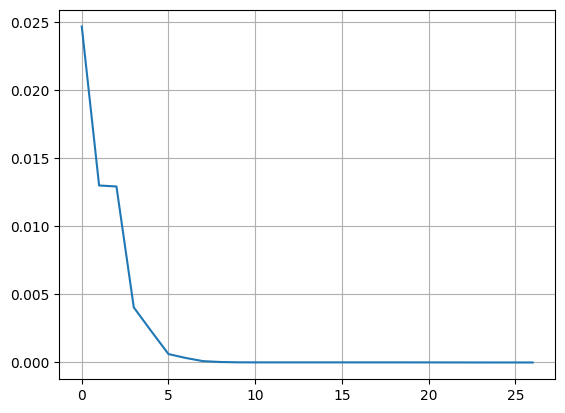

In [39]:
plt.plot(T.J)
plt.grid(1)

In [40]:
pl

NameError: name 'pl' is not defined